In [1]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import accuracy_score, f1_score, classification_report

Analysis for 10% implementation

In [41]:
# read data
er_base = pd.read_csv("dataset/final_results/er_test_strat_base_results.csv")
int_base = pd.read_csv("dataset/final_results/int_test_strat_base_results.csv")
exp_base = pd.read_csv("dataset/final_results/exp_test_strat_base_results.csv")

er_test_output_10 = pd.read_csv("dataset/final_results/er_test_strat_10_3_results.csv")
int_test_output_10 = pd.read_csv("dataset/final_results/int_test_strat_10_3_results.csv")
exp_test_output_10 = pd.read_csv("dataset/final_results/exp_test_strat_10_3_results.csv")

er_test_output_20 = pd.read_csv("dataset/final_results/er_test_strat_20_3_results.csv")
int_test_output_20 = pd.read_csv("dataset/final_results/int_test_strat_20_3_results.csv")
exp_test_output_20 = pd.read_csv("dataset/final_results/exp_test_strat_20_results.csv")

er_test_output_30 = pd.read_csv("dataset/final_results/er_test_strat_30_3_results.csv")
int_test_output_30 = pd.read_csv("dataset/final_results/int_test_strat_30_3_results.csv")
exp_test_output_30 = pd.read_csv("dataset/final_results/exp_test_strat_30_3_results.csv")

er_test_output_40 = pd.read_csv("dataset/final_results/er_test_strat_40_3_results.csv")
int_test_output_40 = pd.read_csv("dataset/final_results/int_test_strat_40_3_results.csv")
exp_test_output_40 = pd.read_csv("dataset/final_results/exp_test_strat_40_3_results.csv")

er_test_output_50 = pd.read_csv("dataset/final_results/er_test_strat_50_3_results.csv")
int_test_output_50 = pd.read_csv("dataset/final_results/int_test_strat_50_3_results.csv")
exp_test_output_50 = pd.read_csv("dataset/final_results/exp_test_strat_50_3_results.csv")

In [8]:
# read ground truths 
exp_test_expected= pd.read_csv("exp_test_strat.csv")
int_test_expected = pd.read_csv("int_test_strat.csv")
er_test_expected = pd.read_csv("er_test_strat.csv")

In [9]:
def extract_id_label(extract_df, label_name='level'):
    extracted = []
    for index, row in extract_df.iterrows():
        extracted.append(row[label_name])
    return extracted

In [10]:
# Calculate the false positive, true positive , false negative, true negative 
# accuracy and so on
def get_tp_fp_tn_fn(test_set_actuals, preds, positive_class):
    TP = 0
    FN = 0
    FP = 0
    TN = 0 
    for i in range(len(test_set_actuals)):
        if test_set_actuals[i] == positive_class:
            if preds[i] == positive_class:
                TP = TP + 1 
            else: 
                FN = FN + 1 
        else:
            if preds[i] == positive_class:
                FP = FP + 1 
            else: 
                TN = TN + 1 
    recall = TP/(TP + FN) if (TP + FN) != 0 else 0 
    precision = TP/(TP + FP) if (TP + FP) != 0 else 0 
    f1_score = 2 * precision*recall/(precision + recall) if (precision + recall) != 0 else 0
    accuracy = (TP + TN)/ (TP+FP+TN+FN)
    return recall, precision, f1_score

In [11]:
def compute_analysis(true_labels, preds, title = ''):
    print(title)
    print("The accuracy is:")
    print(accuracy_score(true_labels,preds))
    print("The macro f1 score is:")
    print(f1_score(true_labels,preds, average='macro'))
    print(classification_report(true_labels,preds))

In [42]:
exp_true_labels=extract_id_label(exp_test_expected)
int_true_labels=extract_id_label(int_test_expected)
er_true_labels=extract_id_label(er_test_expected)

exp_test_output_base_preds = extract_id_label(exp_base, label_name='EX_label')
er_test_output_base_preds = extract_id_label(er_base, label_name='ER_label')
int_test_output_base_preds = extract_id_label(int_base,  label_name='IP_label')

er_test_output_10_preds = extract_id_label(er_test_output_10, label_name='ER_label')
exp_test_output_10_preds = extract_id_label(exp_test_output_10, label_name='EX_label')
int_test_output_10_preds = extract_id_label(int_test_output_10,  label_name='IP_label')

er_test_output_20_preds = extract_id_label(er_test_output_20, label_name='ER_label')
exp_test_output_20_preds = extract_id_label(exp_test_output_20, label_name='EX_label')
int_test_output_20_preds = extract_id_label(int_test_output_20,  label_name='IP_label')

er_test_output_30_preds = extract_id_label(er_test_output_30, label_name='ER_label')
exp_test_output_30_preds = extract_id_label(exp_test_output_30, label_name='EX_label')
int_test_output_30_preds = extract_id_label(int_test_output_30,  label_name='IP_label')

er_test_output_40_preds = extract_id_label(er_test_output_40, label_name='ER_label')
exp_test_output_40_preds = extract_id_label(exp_test_output_40, label_name='EX_label')
int_test_output_40_preds = extract_id_label(int_test_output_40,  label_name='IP_label')

er_test_output_50_preds = extract_id_label(er_test_output_50, label_name='ER_label')
exp_test_output_50_preds = extract_id_label(exp_test_output_50, label_name='EX_label')
int_test_output_50_preds = extract_id_label(int_test_output_50,  label_name='IP_label')

In [38]:
compute_analysis(er_true_labels, er_test_output_base_preds, title="er analysis base")

er analysis base
The accuracy is:
0.7726675427069645
The macro f1 score is:
0.7346566632624266
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       490
           1       0.63      0.67      0.65       234
           2       0.80      0.65      0.72        37

    accuracy                           0.77       761
   macro avg       0.76      0.72      0.73       761
weighted avg       0.78      0.77      0.77       761



In [40]:
compute_analysis(exp_true_labels, exp_test_output_10_preds, title="exp analysis 10")

exp analysis 10
The accuracy is:
0.5651595744680851
The macro f1 score is:
0.30833119424683336
              precision    recall  f1-score   support

           0       0.83      0.64      0.72       637
           1       0.04      0.36      0.07        25
           2       0.24      0.09      0.13        90

    accuracy                           0.57       752
   macro avg       0.37      0.36      0.31       752
weighted avg       0.74      0.57      0.63       752



In [43]:
compute_analysis(exp_true_labels, exp_test_output_20_preds, title="exp analysis 20")

exp analysis 20
The accuracy is:
0.9202127659574468
The macro f1 score is:
0.5919306082387426
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       637
           1       0.25      0.04      0.07        25
           2       0.65      0.86      0.74        90

    accuracy                           0.92       752
   macro avg       0.62      0.62      0.59       752
weighted avg       0.91      0.92      0.91       752



In [22]:
compute_analysis(exp_true_labels, exp_test_output_30_preds, title="exp analysis 30")

exp analysis 30
The accuracy is:
0.5704787234042553
The macro f1 score is:
0.3095965627578051
              precision    recall  f1-score   support

           0       0.83      0.65      0.73       637
           1       0.04      0.36      0.07        25
           2       0.23      0.09      0.13        90

    accuracy                           0.57       752
   macro avg       0.37      0.37      0.31       752
weighted avg       0.73      0.57      0.63       752



In [23]:
compute_analysis(exp_true_labels, exp_test_output_40_preds, title="exp analysis 40")

exp analysis 40
The accuracy is:
0.5585106382978723
The macro f1 score is:
0.306371316761882
              precision    recall  f1-score   support

           0       0.83      0.63      0.72       637
           1       0.04      0.36      0.07        25
           2       0.25      0.09      0.13        90

    accuracy                           0.56       752
   macro avg       0.37      0.36      0.31       752
weighted avg       0.74      0.56      0.63       752



In [24]:
compute_analysis(exp_true_labels, exp_test_output_50_preds, title="exp analysis 50")

exp analysis 50
The accuracy is:
0.5704787234042553
The macro f1 score is:
0.309497611748977
              precision    recall  f1-score   support

           0       0.83      0.65      0.73       637
           1       0.04      0.36      0.07        25
           2       0.24      0.09      0.13        90

    accuracy                           0.57       752
   macro avg       0.37      0.37      0.31       752
weighted avg       0.73      0.57      0.63       752



In [25]:
compute_analysis(er_true_labels, er_test_output_10_preds, title="er analysis 10")

er analysis 10
The accuracy is:
0.7910643889618922
The macro f1 score is:
0.7446592101270032
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       490
           1       0.67      0.68      0.67       234
           2       0.88      0.59      0.71        37

    accuracy                           0.79       761
   macro avg       0.80      0.71      0.74       761
weighted avg       0.79      0.79      0.79       761



In [26]:
compute_analysis(er_true_labels, er_test_output_20_preds, title="er analysis 20")

er analysis 20
The accuracy is:
0.7818659658344284
The macro f1 score is:
0.7232646806078827
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       490
           1       0.66      0.62      0.64       234
           2       0.74      0.62      0.68        37

    accuracy                           0.78       761
   macro avg       0.75      0.70      0.72       761
weighted avg       0.78      0.78      0.78       761



In [27]:
compute_analysis(er_true_labels, er_test_output_30_preds, title="er analysis 30")

er analysis 30
The accuracy is:
0.7818659658344284
The macro f1 score is:
0.754809599927445
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       490
           1       0.64      0.69      0.67       234
           2       0.86      0.68      0.76        37

    accuracy                           0.78       761
   macro avg       0.78      0.73      0.75       761
weighted avg       0.79      0.78      0.78       761



In [28]:
compute_analysis(er_true_labels, er_test_output_40_preds, title="er analysis 40")

er analysis 40
The accuracy is:
0.7805519053876478
The macro f1 score is:
0.7173657416907084
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       490
           1       0.66      0.65      0.66       234
           2       0.68      0.62      0.65        37

    accuracy                           0.78       761
   macro avg       0.73      0.71      0.72       761
weighted avg       0.78      0.78      0.78       761



In [29]:
compute_analysis(er_true_labels, er_test_output_50_preds, title="er analysis 50")

er analysis 50
The accuracy is:
0.7871222076215506
The macro f1 score is:
0.7662616737483114
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       490
           1       0.66      0.69      0.67       234
           2       0.84      0.73      0.78        37

    accuracy                           0.79       761
   macro avg       0.78      0.75      0.77       761
weighted avg       0.79      0.79      0.79       761



In [30]:
compute_analysis(int_true_labels, int_test_output_10_preds, title="int analysis 10")

int analysis 10
The accuracy is:
0.8371212121212122
The macro f1 score is:
0.5688836471736701
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       402
           1       0.00      0.00      0.00        29
           2       0.79      0.92      0.85       361

    accuracy                           0.84       792
   macro avg       0.56      0.58      0.57       792
weighted avg       0.81      0.84      0.82       792



In [31]:
compute_analysis(int_true_labels, int_test_output_20_preds, title="int analysis 20")

int analysis 20
The accuracy is:
0.8383838383838383
The macro f1 score is:
0.5699529269898166
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       402
           1       0.00      0.00      0.00        29
           2       0.81      0.89      0.85       361

    accuracy                           0.84       792
   macro avg       0.56      0.58      0.57       792
weighted avg       0.81      0.84      0.82       792



In [32]:
compute_analysis(int_true_labels, int_test_output_30_preds, title="int analysis 30")

int analysis 30
The accuracy is:
0.8396464646464646
The macro f1 score is:
0.5708658587426864
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       402
           1       0.00      0.00      0.00        29
           2       0.80      0.90      0.85       361

    accuracy                           0.84       792
   macro avg       0.56      0.58      0.57       792
weighted avg       0.81      0.84      0.83       792



In [33]:
compute_analysis(int_true_labels, int_test_output_40_preds, title="int analysis 40")

int analysis 40
The accuracy is:
0.8459595959595959
The macro f1 score is:
0.5744090163066496
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       402
           1       0.00      0.00      0.00        29
           2       0.80      0.91      0.85       361

    accuracy                           0.85       792
   macro avg       0.56      0.59      0.57       792
weighted avg       0.82      0.85      0.83       792



/home/fikram/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fikram/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fikram/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
int_test_output_40_preds

[0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,


In [35]:
compute_analysis(int_true_labels, int_test_output_50_preds, title="int analysis 50")

int analysis 50
The accuracy is:
0.8409090909090909
The macro f1 score is:
0.5708173126281243
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       402
           1       0.00      0.00      0.00        29
           2       0.81      0.88      0.84       361

    accuracy                           0.84       792
   macro avg       0.56      0.58      0.57       792
weighted avg       0.81      0.84      0.83       792



/home/fikram/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fikram/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fikram/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
exp_true_labels=extract_id_label(exp_test_expected)
exp_preds = extract_id_label(exp_test_output, label_name='EX_label')

In [69]:
total_exp_preds_corr = 0
total_exp_preds = len(exp_preds)
exp_true_labels_list = [] 
exp_preds_list = [] 
for k in exp_preds.keys():
    if (exp_true_labels[k] == exp_preds[k]):
        total_exp_preds_corr = total_exp_preds_corr + 1 
    exp_true_labels_list.append(exp_true_labels[k])
    exp_preds_list.append(exp_preds[k])

total_exp_preds_corr/total_exp_preds

0.9372496662216289

In [70]:
np.sum(np.array(exp_true_labels_list) == np.array(exp_preds_list))/total_exp_preds

0.9372496662216289

In [73]:
er_true_labels=extract_id_label(er_test_expected)
er_preds = extract_id_label(er_test_output, label_name='ER_label')


In [74]:
total_er_preds_corr = 0
total_er_preds = len(er_preds)
er_true_labels_list = [] 
er_preds_list = [] 
for k in er_preds.keys():
    if er_true_labels[k] == er_preds[k]:
        total_er_preds_corr = total_er_preds_corr + 1
    er_true_labels_list.append(er_true_labels[k])
    er_preds_list.append(er_preds[k])

total_er_preds_corr/ total_er_preds   


0.7791005291005291

In [75]:
np.sum(np.array(er_true_labels_list) == np.array(er_preds_list))/total_er_preds

0.7791005291005291

In [76]:
int_true_labels=extract_id_label(int_test_expected)
int_preds = extract_id_label(int_test_output, label_name='IP_label')
int_true_labels_list = [] 
int_preds_list = [] 
total_int_preds_corr = 0
total_int_preds = len(int_preds)
for k in int_preds.keys():
    if int_true_labels[k] == int_preds[k]:
        total_int_preds_corr = total_int_preds_corr + 1
    int_true_labels_list.append(int_true_labels[k])
    int_preds_list.append(int_preds[k])
    
total_int_preds_corr/ total_int_preds

0.8403041825095057

In [77]:
np.sum(np.array(int_true_labels_list) == np.array(int_preds_list))/total_int_preds

0.8403041825095057

In [78]:
get_tp_fp_tn_fn(int_true_labels_list, int_preds_list, 1)

(0.0, 0.0, 0)

In [88]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
accuracy_score(int_true_labels_list,int_preds_list)

0.8403041825095057

In [80]:
f1_score(int_true_labels_list,int_preds_list, average='macro')

0.571063723239995

In [81]:
accuracy_score(int_true_labels_list,int_preds_list)

0.8403041825095057

In [82]:
f1_score(er_true_labels_list,er_preds_list, average='macro')

0.7223893245223962

In [83]:
f1_score(exp_true_labels_list,exp_preds_list, average='macro')

0.6668345571667152

In [84]:
get_tp_fp_tn_fn(exp_true_labels_list, exp_preds_list, 2)

(0.8651685393258427, 0.719626168224299, 0.7857142857142857)

In [85]:
set(int_preds_list)

{0, 1, 2}

In [91]:
def compute_analysis(true_labels, preds, title = ''):
    print(title)
    print("The accuracy is:")
    print(accuracy_score(true_labels,preds))
    print("The macro f1 score is:")
    print(f1_score(true_labels,preds, average='macro'))
    print(classification_report(true_labels,preds))

In [92]:
compute_analysis(exp_true_labels_list, exp_preds_list, title="exp analysis 10")

exp analysis 10
The accuracy is:
0.9372496662216289
The macro f1 score is:
0.6668345571667152
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       635
           1       0.44      0.16      0.24        25
           2       0.72      0.87      0.79        89

    accuracy                           0.94       749
   macro avg       0.72      0.67      0.67       749
weighted avg       0.93      0.94      0.93       749



In [93]:
compute_analysis(int_true_labels_list, int_preds_list, title="int analysis 10")

int analysis 10
The accuracy is:
0.8403041825095057
The macro f1 score is:
0.571063723239995
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       401
           1       0.00      0.00      0.00        29
           2       0.79      0.92      0.85       359

    accuracy                           0.84       789
   macro avg       0.56      0.58      0.57       789
weighted avg       0.82      0.84      0.83       789



In [94]:
compute_analysis(er_true_labels_list, er_preds_list, title="er analysis 10")

er analysis 10
The accuracy is:
0.7791005291005291
The macro f1 score is:
0.7223893245223962
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       488
           1       0.64      0.66      0.65       231
           2       0.72      0.62      0.67        37

    accuracy                           0.78       756
   macro avg       0.74      0.71      0.72       756
weighted avg       0.78      0.78      0.78       756



In [5]:
exp_acc = [0.9361, 0.9361, 0.9202, 0.9149, 0.9162, 0.9136]
exp_acc_2 = [0.9361, 0.9230, 0.9210, 0.9170, 0.9154, 0.9120]
er_acc = [0.7984, 0.7810, 0.7831, 0.791, 0.7831, 0.7556]
er_acc_2 = [0.7984,0.7911,0.7818, 0.7819, 0.7805, 0.7871]
int_acc = [0.8510, 0.8408, 0.8497, 0.8371, 0.8380, 0.8396]
int_acc_2 = [0.8510, 0.8371, 0.8384, 0.8396, 0.8460, 0.8460]

In [6]:
exp_f1 = [0.6652, 0.6653, 0.5920, 0.5872, 0.5708, 0.6074]
exp_f1_2 = [0.6652, 0.6230, 0.6001, 0.5971, 0.5800, 0.5950]
er_f1 = [0.7573, 0.7241, 0.7394, 0.7534, 0.7241, 0.7074]
er_f1_2 = [0.7573,0.7447, 0.7232, 0.7548, 0.7663, 0.7663] 
int_f1 = [0.5606, 0.5714, 0.5735, 0.5769, 0.5683, 0.5703]
int_f1_2 = [0.5778, 0.5688, 0.5700, 0.5709, 0.5744, 0.5744] 

In [26]:
from matplotlib import pyplot as plt
percents = [0,10,20,30,40,50]
plt.plot(percents,er_f1, marker='o', label = 'macro f1')
plt.plot(percents,er_acc, marker='o', label = 'accuracy')
leg = plt.legend()
plt.title("Emotional Reaction Results")
plt.ylabel("Performance")
plt.xlabel("Percent Increase with Synthetic Data")


NameError: name 'er_f1' is not defined

Text(0.5, 0, 'Percent Increase with Synthetic Data')

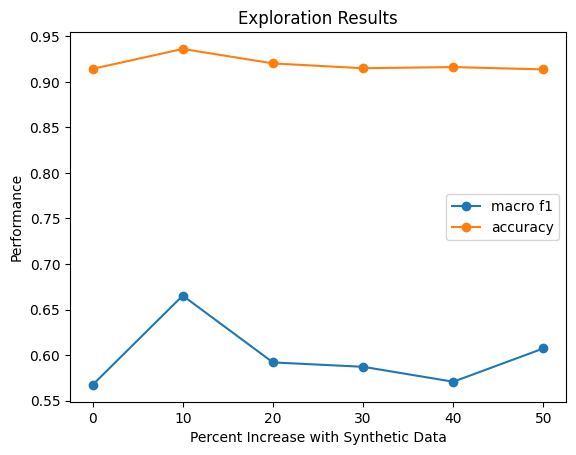

In [8]:
percents = [0,10,20,30,40,50]
plt.plot(percents,exp_f1, marker='o', label = 'macro f1')
plt.plot(percents,exp_acc, marker='o', label = 'accuracy')
leg = plt.legend()
plt.title("Exploration Results")
plt.ylabel("Performance")
plt.xlabel("Percent Increase with Synthetic Data")

Text(0.5, 0, 'Percent Increase with Synthetic Data')

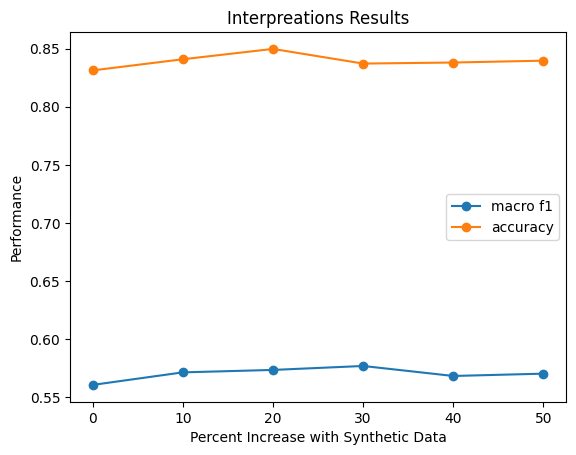

In [9]:
percents = [0,10,20,30,40,50]
plt.plot(percents,int_f1, marker='o', label = 'macro f1')
plt.plot(percents,int_acc, marker='o', label = 'accuracy')
leg = plt.legend()
plt.title("Interpretations Results")
plt.ylabel("Performance")
plt.xlabel("Percent Increase with Synthetic Data")

Text(0.5, 0, 'Percent Increase with Synthetic Data')

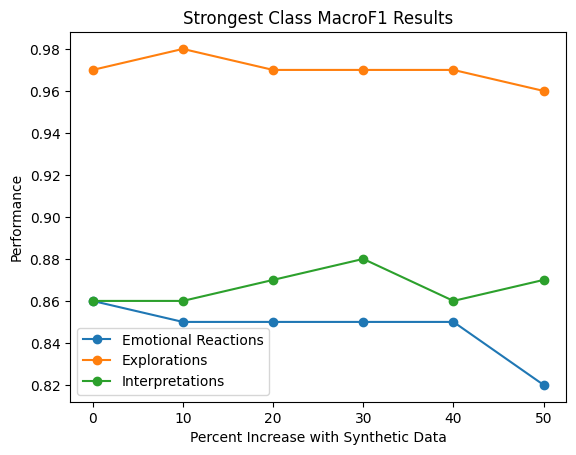

In [27]:
#roberta base 

percents = [0,10,20,30,40,50]
er_weak = [0.86, 0.85, 0.85, 0.85, 0.85, 0.82]
exp_weak = [0.97, 0.98, 0.97, 0.97, 0.97, 0.96] 
int_weak = [0.86, 0.86, 0.87, 0.88, 0.86, 0.87] 
plt.plot(percents,er_weak, marker='o', label = 'Emotional Reactions')
plt.plot(percents,exp_weak, marker='o', label = 'Explorations')
plt.plot(percents,int_weak, marker='o', label = 'Interpretations')

leg = plt.legend()
plt.title("Most Prevalent Class MacroF1 Results")
plt.ylabel("Performance")
plt.xlabel("Percent Increase with Synthetic Data")

In [ ]:
#roberta base 

percents = [0,10,20,30,40,50]
er_weak = [0.77, 0.67, 0.72, 0.74, 0.67, 0.66]
exp_weak = [0, 0.24, 0.07, 0.07, 0, 0.11] 
int_weak = [0, 0, 0, 0, 0, 0] 
plt.plot(percents,er_weak, marker='o', label = 'macro f1')
plt.plot(percents,exp_weak, marker='o', label = 'accuracy')
plt.plot(percents,int_weak, marker='o', label = 'accuracy')

leg = plt.legend()
plt.title("Least Prevalent Class MacroF1 Results")
plt.ylabel("Performance")
plt.xlabel("Percent Increase with Synthetic Data")

In [16]:
# extract and save sample training data
# read 20 samples of training data

df1_er = pd.read_csv("er_train_strat.csv").sample(n=10)
df2_er = pd.read_csv("dataset/processed_data_percents/er_few_shot_proc_50_1.csv").sample(n=10)
df1_er['origin'] = 'human'
df2_er['origin'] = 'machine'
final_er_df_to_check = pd.concat([df1_er,df2_er])
final_er_df_to_check.to_csv("final_er_df_to_check.csv")

In [17]:
df1_exp = pd.read_csv("exp_train_strat.csv").sample(n=10)
df2_exp = pd.read_csv("dataset/processed_data_percents/exp_few_shot_proc_50_1.csv").sample(n=10)
df1_exp['origin'] = 'human'
df2_exp['origin'] = 'machine'
final_exp_df_to_check = pd.concat([df1_exp,df2_exp])
final_exp_df_to_check.to_csv("final_exp_df_to_check.csv")

In [13]:
df1_int = pd.read_csv("int_train_strat.csv").sample(n=10)
df2_int = pd.read_csv("dataset/processed_data_percents/int_few_shot_proc_50_1.csv").sample(n=10)
df1_int['origin'] = 'human'
df2_int['origin'] = 'machine'
final_int_df_to_check = pd.concat([df1_er,df2_er])
final_int_df_to_check.to_csv("final_er_df_to_check.csv")

,Unnamed: 0,id,seeker_post,response_post,level,rationale_labels,rationale_labels_trimmed,response_post_masked,origin
2179,2950,7xq2gf_dubf8r9,Anyone else feel unlovable. All i want is hugs...,I kind of agree with you but doing all that re...,1,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,...",93,. Sometimes I'm just happy to get through the...,human
728,1314,9h8tp1_e6a0ycz,What do you do to stay focused?. asking becaus...,"Honestly would just set five minute goals, do ...",0,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",113,NaN,human
1669,709,41g07l_cz26vua,Wish I was never born. Not looking for attenti...,"Yeah, I resonate with a lot of what you're say...",1,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",117,Let me ask you this: what do you find joy or ...,human
2264,1548,85p72c_dvzg5ct,I can't keep up with school. I can't keep up w...,Sorry to hear that man. What are you studying?...,2,"1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",67,What are you studying? Do you feel like the m...,human
981,1863,6ufhni_dlsalms,Anyone overcome their fears because of suicida...,i'd say that i would have overcame any suicida...,0,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,...",33,NaN,human
